# Compare CO HITRAN and HITEMP

Compare the first overtone of carbon monoxide (the 2300 cm-1 / 4.4 µm band), at various temperatures from 300 to 6000 K, in the HITRAN and HITEMP databases. If using these databases in your work, remember [to cite them](https://radis.readthedocs.io/en/latest/references/references.html#line-databases).

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

## Databases 

The HITRAN database will be automatically downloaded. The HITEMP database files for CO have been preconfigured in the RADIS [~/radis.json](../radis.json) config file. You can see the list of preconfigured databases with `printDatabankList`: 


In [1]:
from radis.misc.config import printDatabankList
printDatabankList()

Databanks in /home/jovyan/.radis:  HITEMP2019-CO


HITEMP2019-CO 
-------
info : HITEMP2019 CO lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium)
path : ['/home/jovyan/databases/HITEMP/05_HITEMP2019_all.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


### Calculations

Let's initialize the plot environment, and choose some conditions for all the calculations : 

In [2]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline

from astropy import units as u
conditions = {"wavenum_min": 1300 / u.cm, 
              "wavenum_max": 2600 / u.cm,
              "molecule":'CO',
              "isotope":'1,2,3',
              "pressure":1.01325 * u.bar,
              "mole_fraction":1,
              "path_length":1 * u.cm,
             }


Now let's calculate the spectra with [calc_spectrum](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [3]:
from radis import calc_spectrum
# CO HITRAN
s_tran = calc_spectrum(**conditions,
                       Tgas=700, 
                       databank='hitran',  # HITRAN automatically downloaded
                       name="HITRAN"
                      )
# without verbose=False this will show all the input parameters. 
# With verbose=2,3,etc... we get increasing number of details about the calculation. 

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_1_1295.00_2605.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_2_1295.00_2605.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_3_1295.00_2605.01.h5
HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005
Calculating Equilibrium Spectrum
Physical Conditions


/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 1.57s


In [4]:
# CO HITEMP
s_temp = calc_spectrum(**conditions,
                       Tgas=700, 
                       databank='hitemp',  # HITRAN automatically downloaded
                       name="HITEMP2019"
                      )

Using database: HITEMP2019-CO
HITEMP2019-CO 
-------
info : HITEMP2019 CO lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium)
path : ['/home/jovyan/databases/HITEMP/05_HITEMP2019_all.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 700 K
   Trot                 700 K
   Tvib                 700 K
   isotope              1,2,3
   mole_fraction        1
   molecule             CO
   path_length          1.0 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2600.0000 cm-1
   wavenum_min          1300.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cu

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 1.64s


Plot the difference with [plot_diff](https://radis.readthedocs.io/en/latest/source/radis.spectrum.compare.html#radis.spectrum.compare.plot_diff)

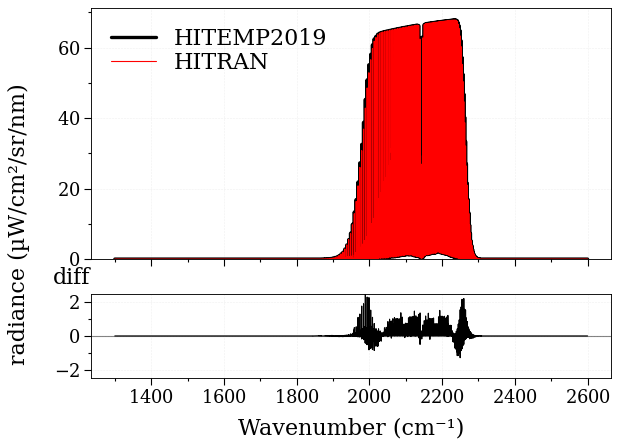

(<Figure size 640x480 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:xlabel='Wavenumber (cm⁻¹)'>])

In [5]:
from radis import plot_diff
plot_diff(s_temp, s_tran, Iunit='µW/cm2/sr/nm')

### Comparison for various temperatures 

Let's make a loop : 

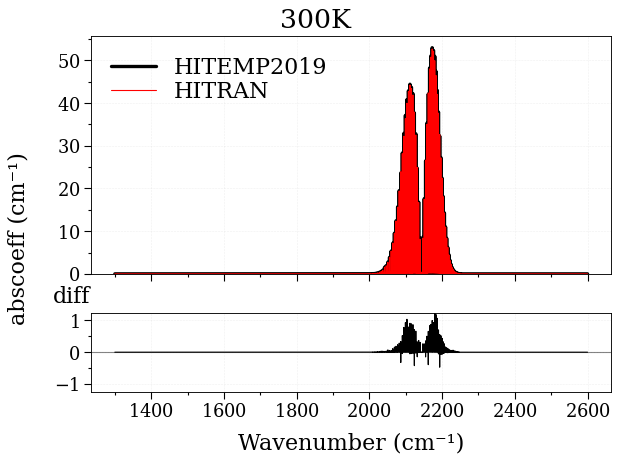

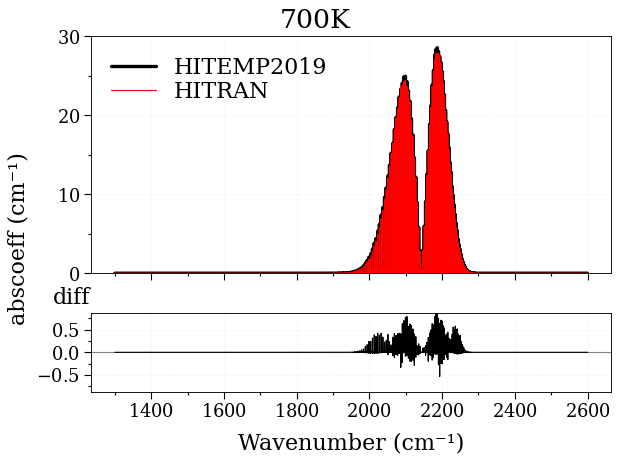

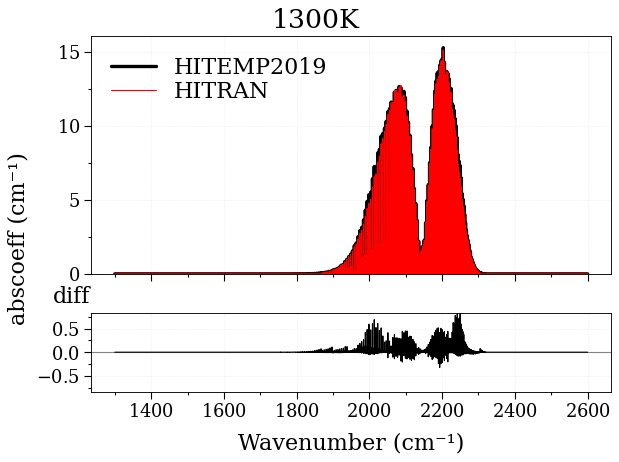

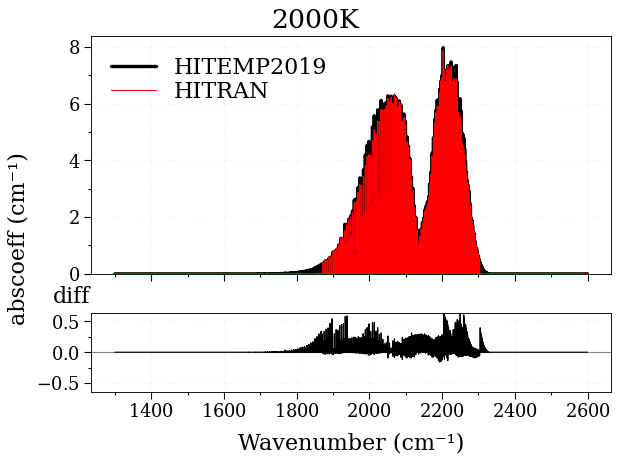

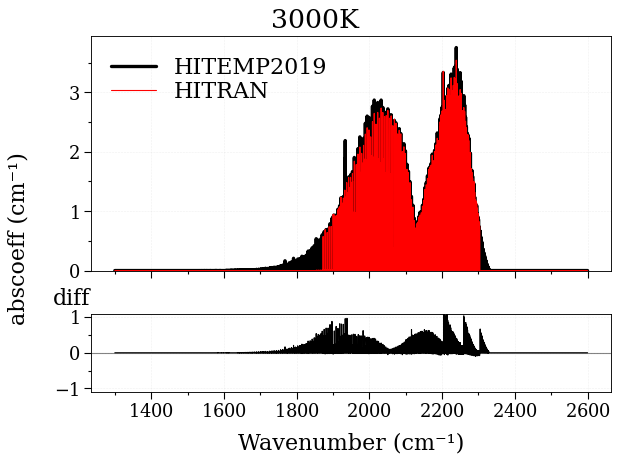

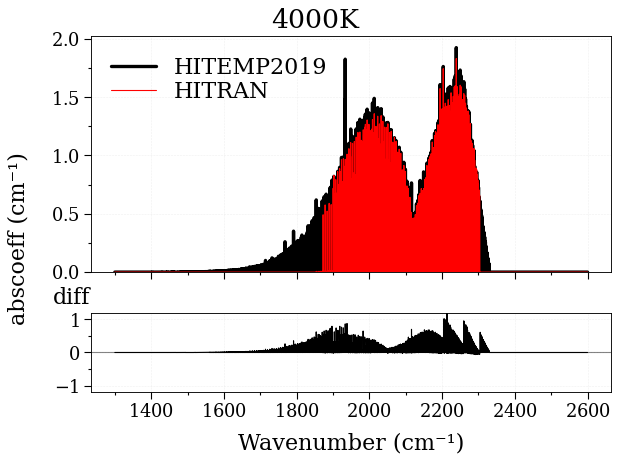

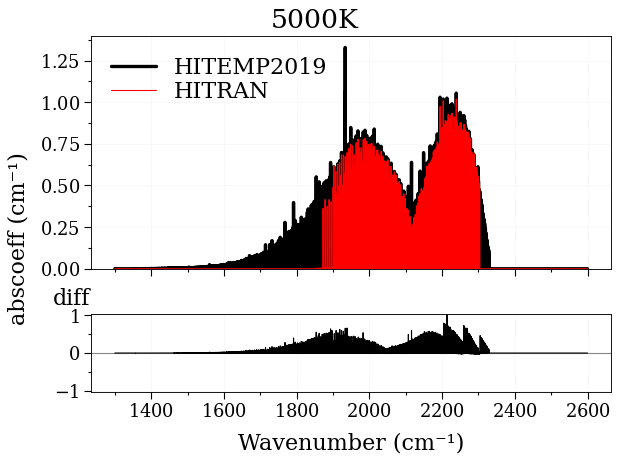

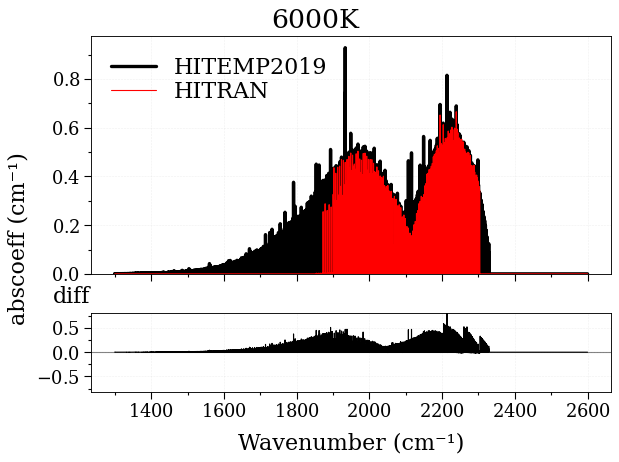

In [6]:
conditions.update({
    "warnings":{
            "MissingSelfBroadeningWarning": "ignore", # HITRAN has no temperature dependance for resonant-broadening
            "HighTemperatureWarning": "ignore", # HITRAN at high temperature is not valid and will trigger warnings. 
        },
    "verbose": False,  # no need to print calculation details 
})
    

for Tgas in [300, 700, 1300, 2000, 3000, 4000, 5000, 6000]:
    s_tran = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank='hitran',  # HITRAN automatically downloaded
                           name="HITRAN")
    s_temp = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank="hitemp",
                           name="HITEMP2019")
    plot_diff(s_temp, s_tran, 'abscoeff', title=f"{Tgas}K")